In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
print("Tensorflow version", tf.__version__)
from tensorflow import keras
print("Keras version", keras.__version__)
import matplotlib.pyplot as plt
from functools import partial
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np

np.random.seed(42) 
tf.random.set_seed(42)

import os
import pandas as pd
import datetime
from datetime import date, time, datetime, timedelta

import cv2 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler


Tensorflow version 2.5.0
Keras version 2.5.0


In [ ]:
dataDir = "/content/drive/MyDrive/AI ML Projects/Insurance/dataset"
trainDataRaw = pd.read_csv("/content/drive/MyDrive/AI ML Projects/Insurance/dataset/train.csv")
testDataRaw = pd.read_csv("/content/drive/MyDrive/AI ML Projects/Insurance/dataset/test.csv")


In [ ]:
#trainDataRaw[trainDataRaw["Amount"] > 0].Condition.value_counts()
trainDataRaw[trainDataRaw["Amount"] < 0].count()

Image_path           1
Insurance_company    1
Cost_of_vehicle      1
Min_coverage         1
Expiry_date          1
Max_coverage         1
Condition            1
Amount               1
dtype: int64

In [ ]:
IMG_SIZE = 275
trainImagePath = os.path.join(dataDir, "trainImages")
fsa = []  
X = [] 
y = [] 
i = 0
for img in trainDataRaw["Image_path"].tolist():
  if (i % 100 == 0):
    print(i, "th image done")
  img_array = cv2.imread(os.path.join(trainImagePath,img ))
  #print(len(img_array))
  #fsa.append(img_array)
  i = i + 1
  new_array = cv2.resize(img_array, (224,224))
  X.append(new_array)
  y.append(trainDataRaw.loc[trainDataRaw["Image_path"]==img].Amount)
  #plt.imshow(img_array)
  #plt.show()
  #break
X = np.array(X)
y = np.array(y)

0 th image done
100 th image done
200 th image done
300 th image done
400 th image done
500 th image done
600 th image done
700 th image done
800 th image done
900 th image done
1000 th image done
1100 th image done
1200 th image done
1300 th image done


In [ ]:
testImagePath = os.path.join(dataDir, "testImages")

X_test = [] 
i = 0
for img in testDataRaw["Image_path"].tolist():
  if (i % 100 == 0):
    print(i, "th image done")
  img_array = cv2.imread(os.path.join(testImagePath,img ))
  #fsa.append(img_array)
  i = i + 1
  new_array = cv2.resize(img_array, (194,300))
  #new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
  X_test.append(new_array)
  #plt.imshow(img_array)
  #plt.show()
  #break
X_test = np.array(X_test)

0 th image done
100 th image done
200 th image done
300 th image done
400 th image done
500 th image done


1399
224.0 224.0 3.0


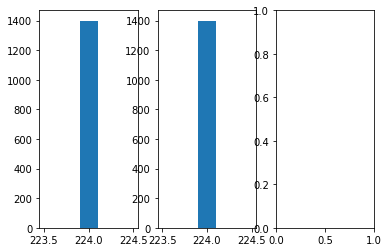

In [ ]:
a = []
b = []
c = []
for i in range(0, len(X)):
  a.append(X[i].shape[0])
  b.append(X[i].shape[1])
  c.append(X[i].shape[2])
print(len(a))
print(np.median(a), np.median(b), np.median(c))
plt.subplot(1,3,1)
plt.hist(a, bins=5)
plt.subplot(1,3,2)
plt.hist(b, bins=5)
plt.subplot(1,3,3)


In [ ]:
from numpy import save

#print(X.shape, y.shape, X_test.shape)
#save(os.path.join(dataDir, "X_224_dim.npy" ), X)
#save(os.path.join(dataDir, "y.npy" ), y)
#save(os.path.join(dataDir, "X_test.npy" ), X_test)

#save('/content/drive/MyDrive/AI ML Projects/AV EV Identification/y_emergency_Vehicle.npy', y)
#save('/content/drive/MyDrive/AI ML Projects/AV EV Identification/X_test_emergency_Vehicle.npy', X_test)

X = np.load(os.path.join(dataDir, "X.npy"))
y = np.load(os.path.join(dataDir, "y.npy" ))
X_test = np.load(os.path.join(dataDir, "X_test.npy" ))
print(X.shape, y.shape, X_test.shape)

(1399, 300, 194, 3) (1399, 1) (600, 300, 194, 3)


In [ ]:
#trainDataRaw[~trainDataRaw["Cost_of_vehicle"].isnull()].isnull().sum()
#trainDataRaw.isnull().sum()
#testDataRaw.isnull().sum()

trainDataRaw = trainDataRaw.fillna(trainDataRaw.median())
print(trainDataRaw.isnull().sum())
#trainDataRaw["Expiry_date"].min
trainDataRaw["Expiry_date"] = pd.to_datetime(trainDataRaw["Expiry_date"])
trainDataRaw["days_left"] = trainDataRaw.apply(lambda row: (row.Expiry_date - pd.to_datetime('2021-06-01')).days, axis = 1)
print(trainDataRaw["days_left"].isna().sum())

#testDataRaw
testDataRaw = testDataRaw.fillna(testDataRaw.median())
print(testDataRaw.isnull().sum())
#trainDataRaw["Expiry_date"].min
testDataRaw["Expiry_date"] = pd.to_datetime(testDataRaw["Expiry_date"])
testDataRaw["days_left"] = testDataRaw.apply(lambda row: (row.Expiry_date - pd.to_datetime('2021-06-01')).days, axis = 1)
print(testDataRaw["days_left"].isna().sum())



Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
Condition            0
Amount               0
dtype: int64
0
Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
dtype: int64
0


In [ ]:
print(trainDataRaw.groupby("Insurance_company").Amount.mean())
print(trainDataRaw.groupby("Insurance_company").Max_coverage.mean())
print(trainDataRaw.Amount.mean())
print(trainDataRaw.Max_coverage.mean())

Insurance_company
A     4284.962121
AA    4442.276423
AC    3942.773109
B     4267.918919
BB    3894.540323
BC    4138.347107
BQ    4279.389313
C     3703.198473
DA    4144.148438
O     3894.626984
RE    4275.456897
Name: Amount, dtype: float64
Insurance_company
A     11738.882424
AA    11914.472846
AC    10653.950252
B     10286.644865
BB    11254.974194
BC    11610.890909
BQ    12007.917252
C     10857.308702
DA    10685.472187
O     11318.770794
RE    10297.698621
Name: Max_coverage, dtype: float64
4116.77340957827
11143.369521086479


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

#insur_comp_encoder = OneHotEncoder()
#insur_comp_encoder.fit(trainDataRaw['Insurance_company'].unique().reshape(1, -1))
#transformed = insur_comp_encoder.transform(trainDataRaw['Insurance_company'].to_numpy().reshape(-1, 1))
#Create a Pandas DataFrame of the hot encoded column
#ohe_df = pd.DataFrame(transformed, columns=insur_comp_encoder.get_feature_names())
#concat with original data
#data = pd.concat([data, ohe_df], axis=1).drop(['Profession'], axis=1)

insur_comp_encoder = LabelBinarizer()
insur_comp_encoder.fit(trainDataRaw['Insurance_company'])
transformed = insur_comp_encoder.transform(trainDataRaw['Insurance_company'])
ohe_df = pd.DataFrame(transformed)
print(ohe_df)
trainDataRawEncoded= pd.concat([trainDataRaw, ohe_df], axis=1).drop(['Insurance_company'], axis=1)

#testDataRaw
test_insur_comp_encoder = LabelBinarizer()
test_insur_comp_encoder.fit(testDataRaw['Insurance_company'])
transformed_test = test_insur_comp_encoder.transform(testDataRaw['Insurance_company'])
ohe_df_test = pd.DataFrame(transformed_test)
#print(ohe_df_test)
testDataRawEncoded= pd.concat([testDataRaw, ohe_df_test], axis=1).drop(['Insurance_company'], axis=1)
#print(testDataRawEncoded)

      0   1   2   3   4   5   6   7   8   9   10
0      0   0   0   0   0   0   1   0   0   0   0
1      0   0   0   0   0   0   1   0   0   0   0
2      1   0   0   0   0   0   0   0   0   0   0
3      1   0   0   0   0   0   0   0   0   0   0
4      0   0   1   0   0   0   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
1394   0   0   0   0   0   0   0   0   1   0   0
1395   0   0   0   0   0   0   1   0   0   0   0
1396   0   1   0   0   0   0   0   0   0   0   0
1397   1   0   0   0   0   0   0   0   0   0   0
1398   0   0   0   1   0   0   0   0   0   0   0

[1399 rows x 11 columns]


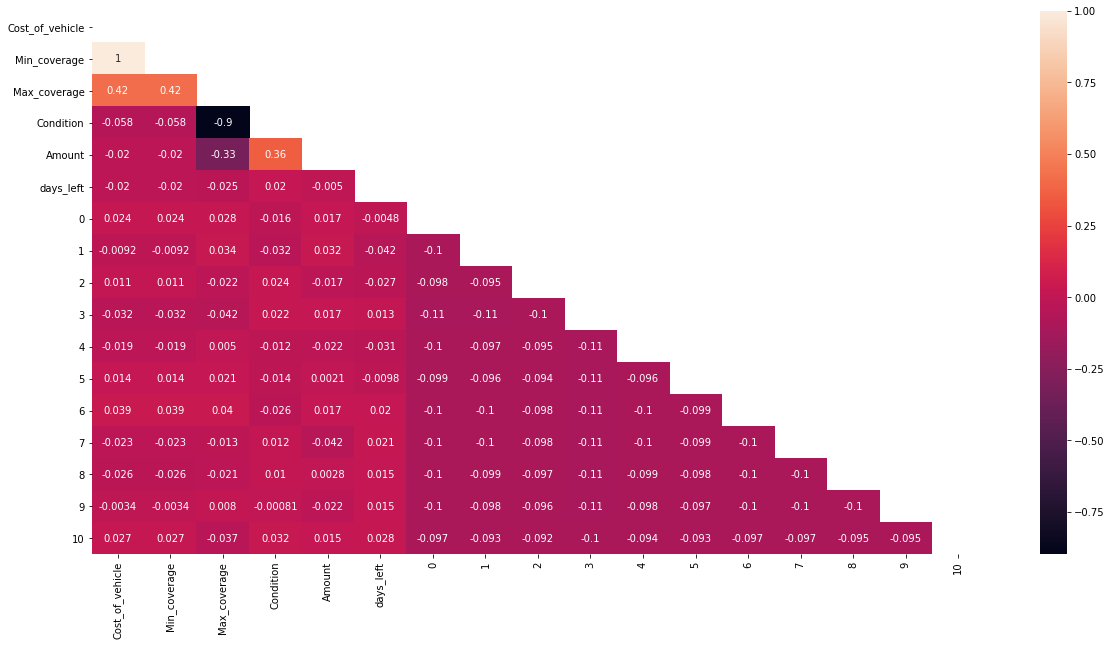

In [ ]:
corrMatrix=trainDataRawEncoded.corr()
#print(corrMatrix)

plt.figure(figsize=(20,10))
mask = np.zeros_like(corrMatrix,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrMatrix,mask=mask,annot=True)
plt.show()

In [ ]:
tempSelection = [
 'Cost_of_vehicle',
 'Min_coverage',
 'Max_coverage',
 'days_left',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10
 ]
x2Temp = trainDataRawEncoded[tempSelection].to_numpy()
#testDataRawEncoded
x2Temp_test = testDataRawEncoded[tempSelection].to_numpy()
#x2Temp.describe()

In [ ]:
print(x2Temp.shape, x2Temp_test.shape, X.shape, y.shape, X_test.shape)
#xCombined = np.concatenate((x2Temp,X),axis=1)
xCombined = []
#print()
for i in range(0, X.shape[0]):
  #print(i)
  xCombined.append([x2Temp[i], X[i]])
xCombined = np.array(xCombined)
print(xCombined.shape)
x_train, x_test, y_train, y_test = train_test_split(xCombined, y, test_size=0.2)
print(len(x_train), "train +", len(x_test), "test")


(1399, 15) (600, 15) (1399, 300, 194, 3) (1399, 1) (600, 300, 194, 3)
(1399, 2)
1119 train + 280 test


In [ ]:
x_train1 = []
x_train2 = []
x_test1 = []
x_test2 = []
for i in range (0, len(x_train)):
  x_train1.append(x_train[i][0])
  x_train2.append(x_train[i][1])
for i in range (0, len(x_test)):
  x_test1.append(x_test[i][0])
  x_test2.append(x_test[i][1])
x_train1 = np.array(x_train1)
x_train2 = np.array(x_train2)
x_test1 = np.array(x_test1)
x_test2 = np.array(x_test2)

print(np.array(x_train1).shape, np.array(x_train2).shape, np.array(x_test1).shape, np.array(x_test2).shape)


(1119, 15) (1119, 300, 194, 3) (280, 15) (280, 300, 194, 3)


In [ ]:
x_full_train1 = np.copy(x2Temp)
x_full_train2 = np.copy(X)
y_full_train = np.copy(y)
x_final_test1 = np.copy(x2Temp_test)
x_final_test2 =  np.copy(X_test)

print(x_full_train1.shape, x_full_train2.shape,x_final_test1.shape, x_final_test2.shape )

(1399, 15) (1399, 300, 194, 3) (600, 15) (600, 300, 194, 3)


In [ ]:
y_full_train[y_full_train < 0] = 0

y_full_train[np.isnan(y_full_train)] = 0
y_full_train[y_full_train > 10000] = 10000

print(np.where(y_full_train < 0))
print(np.isnan(y_full_train).sum())



(array([], dtype=int64), array([], dtype=int64))
0


In [ ]:
y_train[y_train < 0] = 0
y_test[y_test < 0] = 0

y_train[np.isnan(y_train)] = 0
y_test[np.isnan(y_test)] = 0

print(np.where(y_train < 0))
print(np.isnan(y_train).sum())
print(np.isnan(x_train1).sum())

print(np.isnan(y_test).sum())


(array([], dtype=int64), array([], dtype=int64))
0
0
0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

power = PowerTransformer(method='yeo-johnson', standardize=True)
scaler = StandardScaler()
scalery = MinMaxScaler(feature_range=(0, 1))


y_train[y_train < 0] = 0
y_train[y_train > 10000] = 10000
y_test[y_test < 0] = 0
y_test[y_test > 10000] = 10000


# transform data
scaled_x_train1 = scaler.fit_transform(x_train1)
scaled_x_train1 = power.fit_transform(scaled_x_train1)
scaled_x_train2 = x_train2 / 255.0 #scaler.fit_transform(x_train2)
scaled_x_test1 = scaler.fit_transform(x_test1)
scaled_x_test1 = power.fit_transform(scaled_x_test1)

scaled_x_test2 = x_test2 / 255.0 #scaler.fit_transform(x_test2)

#power2 = PowerTransformer(method='box-cox', standardize=True)

scaled_y_train = y_train / 10000.0 #scalery.fit_transform(y_train) #
scaled_y_test = y_test / 10000.0 #scalery.fit_transform(y_test) #


print(type(scaled_x_train1))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

power = PowerTransformer(method='yeo-johnson', standardize=True)
scaler = StandardScaler()
scalery = MinMaxScaler(feature_range=(0, 1))

#x_full_train1, x_full_train2,x_final_test1, x_final_test2  , y_full_train

# transform data
scaled_x_full_train1 = scaler.fit_transform(x_full_train1)
scaled_x_full_train1 = power.fit_transform(scaled_x_full_train1)
scaled_x_full_train2 = x_full_train2 / 255.0 #scaler.fit_transform(x_train2)
scaled_x_final_test1 = scaler.fit_transform(x_final_test1)
scaled_x_final_test1 = power.fit_transform(scaled_x_final_test1)

scaled_x_final_test2 = x_final_test2 / 255.0 #scaler.fit_transform(x_test2)

#power2 = PowerTransformer(method='box-cox', standardize=True)

scaled_y_full_train = y_full_train / 10000.0 #scalery.fit_transform(y_train) #
#scaled_x_full_train1 , scaled_x_full_train2 , scaled_x_final_test1 , scaled_x_final_test2 , scaled_y_full_train

1.0
0.43085


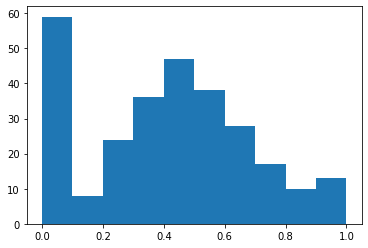

In [ ]:
#print(np.where(scaled_y_test < 0))#
#print(max(scaled_x_train1.all()) , max(scaled_x_train2.all()))
#np.isnan(y_train).sum()
#scaled_y_train[np.isnan(scaled_y_train)]
print(np.percentile(scaled_y_train, 100))
print(np.median(scaled_y_test))
plt.hist(scaled_y_test, bins=10)
plt.show()

In [ ]:
from xgboost import XGBRegressor

XGBModel = XGBRegressor(n_estimators=250,max_depth=10,booster='gbtree',n_jobs=-1,learning_rate=0.05,reg_lambda=0.01,reg_alpha=0.3, colsample_bytree =  0.7, gamma = 0.0, min_child_weight = 7, objective = 'reg:squarederror', subsample = 0.7)

XGBModel.fit(scaled_x_train1, scaled_y_train)

ypredXgb = XGBModel.predict(scaled_x_test1)
print("Train Accuracy Score " , r2_score(scaled_y_test, ypredXgb) )


Train Accuracy Score  0.08304338485272378


In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Flatten
#from keras.layers import Dropout

from tensorflow.keras.layers import concatenate
#from keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import efficientnet.keras as efn
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def cnn_base_model():
  DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")
  model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[300, 194, 3]), 
    keras.layers.MaxPooling2D(pool_size=2), 
    DefaultConv2D(filters=128),  
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(units=1, activation="linear"),
])               
  #model.compile(loss="mean_squared_error", optimizer="nadam")    
  return model

def mlp_base_model():
  model = Sequential()
  model.add(Dense(8, input_shape=[15], activation="relu"))
  #model.add(keras.layers.Dropout(0.2))
  #model.add(Dense(8, activation="relu"))
  #model.add(keras.layers.Dropout(0.2))
  #model.add(Dense(8, activation="relu"))
  model.add(Dense(4, activation="relu"))
  model.add(Dense(4, activation="relu", name = "final_mlp"))
  #model.add(Dense(1, activation="linear"))
  #model.compile(loss="mean_squared_error", optimizer="nadam", metrics=["accuracy"])
  # return our model
  return model

def combined_base_model():
  # create the MLP and CNN models
  mlp = mlp_base_model()
  #cnn = cnn_base_model()
  cnn = ResNet50_model()
  #cnn = VGG16_deeper_dropout_model()
  print("Models created successfully")
  # create the input to our final set of layers as the *output* of both
  # the MLP and CNN
  combinedInput = concatenate([cnn.output, mlp.output])
  # our final FC layer head will have two dense layers, the final one
  # being our regression head
  x = Dense(100, activation="relu")(combinedInput)
  x = Dense(100, activation="relu", name = "combinedDenseFinal")(x)
  #x = Dense(2, activation="relu")(x)
  x = Dense(1, activation="linear")(x)
  print("Almost all done created successfully")
  # our final model will accept categorical/numerical data on the MLP
  # input and images on the CNN input, outputting a single value (the
  # predicted price of the house)
  model = Model(inputs=[cnn.input, mlp.input], outputs=x)
  opt = Adam(lr=1e-3, decay=1e-3 / 200)
  model.compile(loss="mean_squared_error", optimizer=opt)
  return model 

def VGG16_deeper_dropout_model():
  base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(1024, activation='relu'),
                                  #keras.layers.Dropout(0.2),
                                  keras.layers.Dense(1, activation="linear")                                     
                                  ])
  return model

def ResNet50_model():
  base_model = ResNet50(include_top=False, input_shape=(300, 194, 3))
  base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  #keras.layers.Flatten(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(1024, activation='relu', name = "resnetDenseFinal"),
                                  #keras.layers.Dropout(0.2),
                                  #keras.layers.Dense(1, activation="linear")
                                  ])
  opt = Adam(lr=1e-3, decay=1e-3 / 200)
  model.compile(loss="mean_squared_error", optimizer=opt)
  #base_learning_rate = 0.00001
  #model.compile(loss="mean_squared_error", optimizer="nadam")  
  return model

def old_model():
  # create model
  DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")
  model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]), 
    keras.layers.MaxPooling2D(pool_size=2), 
    DefaultConv2D(filters=128),  
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=1, activation='sigmoid')
])               
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])    
  return model


In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions

# load model
model1 = VGG16()
model2 = InceptionV3()
model3 = ResNet50()



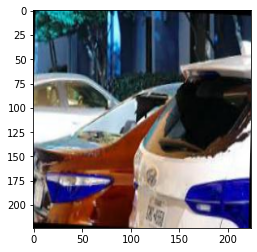

steel_drum (36.26%)


In [ ]:
#trialimage = X[2].reshape((1, 299, 299, 3))
#trialimage = cv2.resize(X[1], (299,299))
#trialimage = trialimage.reshape((1, trialimage.shape[0], trialimage.shape[1], trialimage.shape[2]))

trialimage = cv2.resize(X[5], (224,224))
plt.imshow(trialimage)
plt.show()

trialimage = trialimage.reshape(1, trialimage.shape[0], trialimage.shape[1], trialimage.shape[2])
#trialimage = X[4].reshape((1, X[4].shape[0], X[4].shape[1], X[4].shape[2]))
# prepare the image for the VGG model
trialimage = preprocess_input(trialimage)
yhat = model1.predict(trialimage)
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

In [ ]:
#got 18 R2 with 4,1 deep layer in the concatenated layer + Resnet (3 dense + 2 d/o) + mlp (3 dense)
#Got -0.15 negative R2 4,1 deep layer in the concatenated layer + Resnet (3 dense + 2 d/o) + mlp (5 dense + 2d/o)
#Got  15.97 R2 4,1 deep layer in the concatenated layer + Resnet (5 dense + 4 d/o) + mlp (3 dense)
#Got  16.65 R2 4,1 deep layer in the concatenated layer + Resnet (4 dense + 3 d/o) + mlp (3 dense)

#things to try - , add more image generated data 
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#batch_size = 32

#train_datagen = ImageDataGenerator(
#        rotation_range=10, # rotation
#        width_shift_range=0.2, # horizontal shift
#        height_shift_range=0.2, # vertical shift
#        zoom_range=0.2, # zoom
#        horizontal_flip=True, # horizontal flip
#        brightness_range=[0.2,1.2]) # brightness
train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8])  # brightness

#model = combined_base_model()
#model = cnn_base_model()
model = ResNet50_model()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

Resnet only but full train data
trial = model.fit(
	train_datagen.flow(scaled_x_full_train2,  scaled_y_full_train,
                                       #batch_size=batch_size, 
                                       seed=27,
                                       shuffle=False), 
	#validation_data=(scaled_x_test2, scaled_y_test),
	epochs=500, callbacks=[callback2])                       


#Resnet Only but with separate validation data
#trial = model.fit(
#	train_datagen.flow(scaled_x_train2,  scaled_y_train,
#                                       #batch_size=batch_size, 
#                                       seed=27,
#                                       shuffle=False), 
#	validation_data=(scaled_x_test2, scaled_y_test),
#	epochs=500, callbacks=[callback])                       

#for concatenated CNN only
trial = model.fit(
	train_datagen.flow((scaled_x_train2, scaled_x_train1), scaled_y_train,
                                       #batch_size=batch_size, 
                                       seed=27,
                                       shuffle=False), 
	validation_data=([scaled_x_test2, scaled_x_test1], scaled_y_test),
	epochs=500, callbacks=[callback])                       

#trial = model.fit(
#	 x_train2, y_train,
#  scaled_x_train2, scaled_y_train,
#	validation_data=(x_test2, y_test),
#	validation_data=(scaled_x_test2, scaled_y_test),
#	epochs=200, callbacks=[callback])                       

#trial = model.fit(
#	x=[scaled_x_train1, scaled_x_train2], y=scaled_y_train,
#	validation_data=([scaled_x_test1, scaled_x_test2], scaled_y_test),
#	epochs=500, callbacks=[callback])                       

#y_model = model.predict(scaled_x_test2)
y_model = model.predict(scaled_x_full_train2)
print(100*r2_score(scaled_y_full_train, y_model))
#print(100*r2_score(scaled_y_test, y_model))


Models created successfully
Almost all done created successfully
Epoch 1/500
35/35 [==============================] - 17s 406ms/step - loss: 0.5711 - val_loss: 0.1590
Epoch 2/500
35/35 [==============================] - 13s 377ms/step - loss: 0.0792 - val_loss: 0.0773
Epoch 3/500
35/35 [==============================] - 13s 380ms/step - loss: 0.0756 - val_loss: 0.0968
Epoch 4/500
35/35 [==============================] - 13s 383ms/step - loss: 0.0695 - val_loss: 0.0739
Epoch 5/500
35/35 [==============================] - 13s 383ms/step - loss: 0.0673 - val_loss: 0.0681
Epoch 6/500
35/35 [==============================] - 13s 382ms/step - loss: 0.0729 - val_loss: 0.0937
Epoch 7/500
35/35 [==============================] - 13s 376ms/step - loss: 0.0636 - val_loss: 0.0849
Epoch 8/500
35/35 [==============================] - 13s 379ms/step - loss: 0.0605 - val_loss: 0.0805
Epoch 9/500
35/35 [==============================] - 14s 385ms/step - loss: 0.0616 - val_loss: 0.0790
Epoch 10/500
35/3

ValueError: ignored

In [ ]:
outputs_model = Model(inputs=model.input,
                                 outputs=model.get_layer("resnetDenseFinal").output)
train_features=np.zeros(shape=(scaled_x_train2.shape[0],1024))
for i in range(0,scaled_x_train2.shape[0]):
    inter_output = outputs_model.predict(scaled_x_train2[i].reshape((1, scaled_x_train2[i].shape[0], scaled_x_train2[i].shape[1], scaled_x_train2[i].shape[2])))
    train_features[i]=inter_output

test_features=np.zeros(shape=(scaled_x_test2.shape[0],1024))
for i in range(0,scaled_x_test2.shape[0]):
    inter_output = outputs_model.predict(scaled_x_test2[i].reshape((1, scaled_x_test2[i].shape[0], scaled_x_test2[i].shape[1], scaled_x_test2[i].shape[2])))
    test_features[i]=inter_output

print(train_features.shape, scaled_x_train1.shape, test_features.shape, scaled_x_test1.shape)

combined_train = np.concatenate((train_features,scaled_x_train1),axis=1)
combined_test = np.concatenate((test_features,scaled_x_test1),axis=1)
print(combined_train.shape, combined_test.shape)

XGBModel.fit(combined_train, scaled_y_train)

ypredXgb = XGBModel.predict(combined_test)
print("Train Accuracy Score " , r2_score(scaled_y_test, ypredXgb) )


(1119, 100) (1119, 15) (280, 100) (280, 15)
(1119, 115) (280, 115)
Train Accuracy Score  0.12600987160484145


In [ ]:
outputs_model = Model(inputs=model.input,
                                 outputs=model.get_layer("resnetDenseFinal").output)
train_features=np.zeros(shape=(scaled_x_full_train2.shape[0],1024))
for i in range(0,scaled_x_full_train2.shape[0]):
    inter_output = outputs_model.predict(scaled_x_full_train2[i].reshape((1, scaled_x_full_train2[i].shape[0], scaled_x_full_train2[i].shape[1], scaled_x_full_train2[i].shape[2])))
    train_features[i]=inter_output

print(train_features.shape, scaled_x_full_train2.shape)

combined_train = np.concatenate((train_features,scaled_x_full_train1),axis=1)
print(combined_train.shape)

XGBModel.fit(combined_train, scaled_y_full_train)

ypredXgb_train = XGBModel.predict(combined_train)
print("Train Accuracy Score " , r2_score(scaled_y_full_train, ypredXgb_train) )



(1399, 1024) (1399, 300, 194, 3)
(1399, 1039)
Train Accuracy Score  0.9883984797918867


In [ ]:
from xgboost import XGBRegressor

XGBModel = XGBRegressor(n_estimators=250,max_depth=10,booster='gbtree',n_jobs=-1,learning_rate=0.05,reg_lambda=0.01,reg_alpha=0.3, colsample_bytree =  0.7, gamma = 0.0, min_child_weight = 7, objective = 'reg:squarederror', subsample = 0.7)

XGBModel.fit(combined_train, scaled_y_train)

ypredXgb = XGBModel.predict(combined_test)
print("Train Accuracy Score " , r2_score(scaled_y_test, ypredXgb) )


Train Accuracy Score  0.17826169547384663


In [ ]:
#scaled_x_full_train1 , scaled_x_full_train2 , scaled_x_final_test1 , scaled_x_final_test2 , scaled_y_full_train
outputs_model = Model(inputs=model.input,
                                 outputs=model.get_layer("resnetDenseFinal").output)
inp_features_final =np.zeros(shape=(scaled_x_final_test2.shape[0],1024))
for i in range(0,scaled_x_final_test2.shape[0]):
    inter_output = outputs_model.predict([scaled_x_final_test2[i].reshape((1, scaled_x_final_test2[i].shape[0], scaled_x_final_test2[i].shape[1], scaled_x_final_test2[i].shape[2])))
    inp_features_final[i]=inter_output

print(inp_features_final.shape, scaled_x_final_test1.shape)

combined_input = np.concatenate((inp_features_final,scaled_x_final_test1),axis=1)

print(combined_input.shape)

ypredXgb_final = XGBModel.predict(combined_input)


(600, 100) (600, 15)
(600, 115)


In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#scaled_x_full_train1 , scaled_x_full_train2 , scaled_x_final_test1 , scaled_x_final_test2 , scaled_y_full_train
#batch_size = 32

#train_datagen = ImageDataGenerator(
#        rotation_range=10, # rotation
#        width_shift_range=0.2, # horizontal shift
#        height_shift_range=0.2, # vertical shift
#        zoom_range=0.2, # zoom
#        horizontal_flip=True, # horizontal flip
#        brightness_range=[0.2,1.2]) # brightness
train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8])  # brightness
                                   
model = combined_base_model()
#model = cnn_base_model()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8])  # brightness

trial = model.fit(
	train_datagen.flow((scaled_x_full_train2, scaled_x_full_train1), scaled_y_full_train,
                                       #batch_size=batch_size, 
                                       seed=27,
                                       shuffle=False), 
	epochs=500, callbacks=[callback])                       

#trial = model.fit(
#	 x_train2, y_train,
#  scaled_x_train2, scaled_y_train,
#	validation_data=(x_test2, y_test),
#	validation_data=(scaled_x_test2, scaled_y_test),
#	epochs=200, callbacks=[callback])                       

#trial = model.fit(
#	x=[scaled_x_train1, scaled_x_train2], y=scaled_y_train,
#	validation_data=([scaled_x_test1, scaled_x_test2], scaled_y_test),
#	epochs=500, callbacks=[callback])                       

#y_model = model.predict(scaled_x_test2)
y_model = model.predict([scaled_x_full_train2, scaled_x_full_train1])
print(100*r2_score(scaled_y_full_train, y_model))


In [ ]:
y_model[np.where(y_model == 0)].size

0

In [ ]:
from sklearn.metrics import r2_score
y_model_final = model.predict([scaled_x_final_test2, scaled_x_final_test1])
y_model_final_unscaled = y_model_final * 10000 

In [ ]:
#finalSub = pd.concat([testDataRaw, pd.DataFrame(y_model_final_unscaled)], axis=1)
ypredXgb_final_unscaled = ypredXgb_final * 10000
finalSub = pd.concat([testDataRaw, pd.DataFrame(ypredXgb_final_unscaled)], axis=1)

finalSub.rename(columns = {0:'Amount'}, inplace = True)

finalSub["Condition"] = finalSub["Amount"].apply(lambda x : 0 if x ==0 else 1)

In [ ]:
finalColSelect = ['Image_path',
  'Condition',
 'Amount'
]
finalSub[finalColSelect].to_csv(os.path.join(dataDir, "submission5.csv" ),index=False)

In [ ]:
finalSub.columns.tolist()

['Image_path',
 'Insurance_company',
 'Cost_of_vehicle',
 'Min_coverage',
 'Expiry_date',
 'Max_coverage',
 'days_left',
 'Amount',
 'Condition']

In [ ]:
finalSub.columns.tolist()

['Image_path',
 'Insurance_company',
 'Cost_of_vehicle',
 'Min_coverage',
 'Expiry_date',
 'Max_coverage',
 'days_left',
 'Amount',
 'Condition']